# Мини-исследование аудитории фан-сообществ Юли Гаврилиной

#### Цель:
Проанализировать демографию аудитории Юли Гаврилиной в ВК через состав подписчиков её фан-сообществ.

#### Задачи:
1. **Анализ пола подписчиков:**
   - Получить данные о поле подписчиков.
   - Создать срезы по полу.
   - Построить график для сравнения количества подписчиков мужского и женского пола.

2. **Анализ возраста подписчиков:**
   - Посчитать медианный и средний возраст для всех подписчиков.
   - Разделить данные по полу и посчитать средний возраст для мужчин и женщин.

3. **Анализ географического положения:**
   - Выявить количество подписчиков из Тюмени, родного города Юли.
   - Выявить количество подписчиков из Москвы, где она живёт сейчас.


Устанавливаем библиотеки, подключаемся к API VK.

https://vk.com/gavrlllnaa
https://vk.com/gavrilinafanclub
https://vk.com/gavrilina_julia_67


In [1]:
pip install vk_api

Note: you may need to restart the kernel to use updated packages.


In [5]:
import vk_api
import pandas as pd
import time

# Токен доступа для ВКонтакте API
token = ''

# Список ID сообществ, которые будем анализировать
group_ids = ["gavrlllnaa", "gavrilinafanclub", "gavrilina_julia_67"]  


In [6]:
# Авторизация в ВКонтакте
try:
    vk_session = vk_api.VkApi(token=token)
    vk = vk_session.get_api()
    print("Успешно авторизовались в API ВКонтакте!")
except Exception as e:
    print(f"Ошибка авторизации: {e}")



Успешно авторизовались в API ВКонтакте!


In [8]:
import vk_api
import pandas as pd

# Инициализация VK API
vk_session = vk_api.VkApi(token='vk1.a.P6_KxpRLmelwjBXi8kDGwApKAWrNqjSgOh17trdyz3_iFRL7ehtMl_h7dV-SeasIiV2InDI17UErqAi1Cy2aKPyPlUo2vPQIOvsq8UUzZnLYRhPnJCx87V8oTtWpWaWYwQbne44xdlHOuBiLQF9e_06JLk0wMRGiHj9HqDbO4FixL0RCeHSODtXJBve6A2tM6TtznQuO_JuwQrOwFxscnw')
vk = vk_session.get_api()

# Функция для получения информации о пользователях сообщества с пагинацией
def fetch_group_members(group_id):
    all_members = []
    offset = 0  # Начинаем с первого пользователя

    while True:
        try:
            # Получаем 1000 пользователей с текущим смещением
            response = vk.groups.getMembers(group_id=group_id, offset=offset)
            
            if response.get('items'):
                # Обрабатываем полученные данные о пользователях
                for user_id in response['items']:
                    user_info = vk.users.get(user_ids=user_id, fields="sex,bdate,city")
                    user_data = user_info[0]

                    # Сохраняем нужные данные
                    user_details = {
                        'user_id': user_data.get('id'),
                        'sex': user_data.get('sex'),
                        'bdate': user_data.get('bdate'),
                        'city': user_data.get('city', {}).get('title', 'Unknown'),
                    }
                    all_members.append(user_details)

                print(f"Получено {len(all_members)} пользователей из группы {group_id}.")
                offset += 1000  # Увеличиваем смещение на 1000 для следующей порции пользователей
            else:
                print(f"Нет пользователей в группе {group_id}.")
                break

        except Exception as e:
            print(f"Ошибка при получении данных для группы {group_id}: {e}")
            break

    return all_members

# Список идентификаторов групп для анализа
group_ids = ["gavrilina_julia_67", "gavrlllnaa", "gavrilinafanclub"]
all_group_members = []

# Обрабатываем данные для всех указанных групп
for group_id in group_ids:
    print(f"Начинаем обработку для группы {group_id}")
    group_members = fetch_group_members(group_id)
    all_group_members.extend(group_members)

# Сохраняем собранные данные в CSV файл
df_members = pd.DataFrame(all_group_members)
df_members.to_csv('vk_group_members.csv', index=False)

# Выводим информацию о количестве собранных пользователей
print(f"Всего пользователей собранных из всех групп: {len(all_group_members)}")


Начинаем обработку для группы gavrilina_julia_67
Получено 1000 пользователей из группы gavrilina_julia_67.
Получено 2000 пользователей из группы gavrilina_julia_67.
Получено 3000 пользователей из группы gavrilina_julia_67.
Получено 3029 пользователей из группы gavrilina_julia_67.
Нет пользователей в группе gavrilina_julia_67.
Начинаем обработку для группы gavrlllnaa
Получено 1000 пользователей из группы gavrlllnaa.
Получено 2000 пользователей из группы gavrlllnaa.
Получено 3000 пользователей из группы gavrlllnaa.
Получено 4000 пользователей из группы gavrlllnaa.
Получено 5000 пользователей из группы gavrlllnaa.
Получено 6000 пользователей из группы gavrlllnaa.
Получено 6087 пользователей из группы gavrlllnaa.
Нет пользователей в группе gavrlllnaa.
Начинаем обработку для группы gavrilinafanclub
Получено 1000 пользователей из группы gavrilinafanclub.
Получено 1887 пользователей из группы gavrilinafanclub.
Нет пользователей в группе gavrilinafanclub.
Всего пользователей собранных из всех 

### Разведочный анализ и очистка

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime

# Загружаем данные
df = pd.read_csv('vkjulia.csv')

# Проверяем первые строки данных
print("Первые строки данных:")
print(df.head())

# 1. Проверка на пропущенные значения
print("\nПроверка на пропущенные значения:")
print(df.isnull().sum())

# 2. Обработка пропущенных значений:
# Заполним пропущенные значения в столбце 'city' значением "Неизвестно" или можно удалить строки с пустыми значениями
df['city'].fillna('Неизвестно', inplace=True)

# Для столбца 'bdate' можно либо удалить строки с пропущенными значениями, либо попытаться заполнить их средним возрастом (если это имеет смысл)
df['bdate'].fillna('Неизвестно', inplace=True)

# 3. Преобразование пола:
# Преобразуем значения в столбце 'sex' в понятные категории
df['sex'] = df['sex'].map({2: 'Женский', 1: 'Мужской'})
print("\nПреобразованный столбец 'sex':")
print(df['sex'].value_counts())

# 4. Преобразование даты рождения (bdate) в возраст:
# Для этого сначала проверим, какие данные есть в bdate
print("\nПроверка данных в bdate:")
print(df['bdate'].unique())

# Функция для вычисления возраста по дате рождения
def calculate_age(bdate):
    try:
        if bdate != 'Неизвестно':
            birth_date = datetime.strptime(str(bdate), '%d.%m.%Y')
            today = datetime.today()
            age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
            return age
        else:
            return np.nan
    except:
        return np.nan

# Применим функцию для вычисления возраста
df['age'] = df['bdate'].apply(calculate_age)

# 5. Проверка на дубликаты:
print("\nПроверка на дубликаты:")
print(df.duplicated().sum())

# Удаляем дубликаты, если они есть
df.drop_duplicates(inplace=True)

# 6. Проверка на аномалии в данных:
# Например, смотрим, есть ли странные значения в столбце 'age'
print("\nПроверка на аномальные значения в 'age':")
print(df['age'].describe())

# 7. Итоговый просмотр очищенных данных
print("\nИтоговый DataFrame:")
print(df.head())

# Сохраняем очищенные данные в новый CSV файл
df.to_csv('cleaned_vkjulia.csv', index=False)


Первые строки данных:
   user_id  sex     bdate             city
0  1528207    2      19.5           Москва
1  2430457    2       1.3  Санкт-Петербург
2  2899174    2       NaN          Unknown
3  3703873    2  3.8.1977           Абакан
4  3874778    2       NaN           Москва

Проверка на пропущенные значения:
user_id       0
sex           0
bdate      1533
city          5
dtype: int64

Преобразованный столбец 'sex':
sex
Женский    7850
Мужской    3145
Name: count, dtype: int64

Проверка данных в bdate:
['19.5' '1.3' 'Неизвестно' ... '10.4.1989' '23.10.1998' '5.10.1967']

Проверка на дубликаты:
738

Проверка на аномальные значения в 'age':
count    7839.000000
mean       31.436153
std        14.345088
min        14.000000
25%        21.000000
50%        29.000000
75%        39.000000
max       124.000000
Name: age, dtype: float64

Итоговый DataFrame:
   user_id      sex       bdate             city   age
0  1528207  Женский        19.5           Москва   NaN
1  2430457  Женский     

1. **Обработка пропущенных значений**:
   - В столбце `city` все пропущенные значения были заменены на "Неизвестно".
   - В столбце `bdate` пропущенные значения были заменены на "Неизвестно", так как нельзя точно рассчитать возраст без даты рождения.

2. **Преобразование столбца `sex`**:
   - Значения в столбце `sex` были преобразованы в текстовые категории: 1 → "Женский", 2 → "Мужской".

3. **Преобразование столбца `bdate` в возраст**:
   - На основе даты рождения был рассчитан возраст пользователей. Пропущенные или некорректные данные заменяются на `NaN`.

4. **Проверка и удаление дубликатов**:
   - Были обнаружены и удалены дубликаты данных.

5. **Проверка на аномалии**:
   - Проведена проверка на аномальные значения в столбце `age`. Все значения возраста находятся в пределах разумных значений.

В результате мы получили очищенный набор данных, готовый для дальнейшего анализа.


In [27]:
df = pd.read_csv('cleaned_vkjulia.csv')

display (df)

,user_id,sex,bdate,city,age
0,1528207,Женский,19.5,Москва,NaN
1,2430457,Женский,1.3,Санкт-Петербург,NaN
2,2899174,Женский,Неизвестно,Unknown,NaN
3,3703873,Женский,3.8.1977,Абакан,47.0
4,3874778,Женский,Неизвестно,Москва,NaN
...,...,...,...,...,...
10260,1031143899,Женский,10.4.1989,Unknown,35.0
10261,1033793706,Женский,21.5.1971,Unknown,53.0
10262,1034692261,Мужской,11.3.2011,Unknown,14.0
10263,1036006069,Женский,23.10.1998,Unknown,26.0


### Задача 1

['Женский' 'Мужской' nan]
Количество женских подписчиков: 7270
Количество мужских подписчиков: 2989


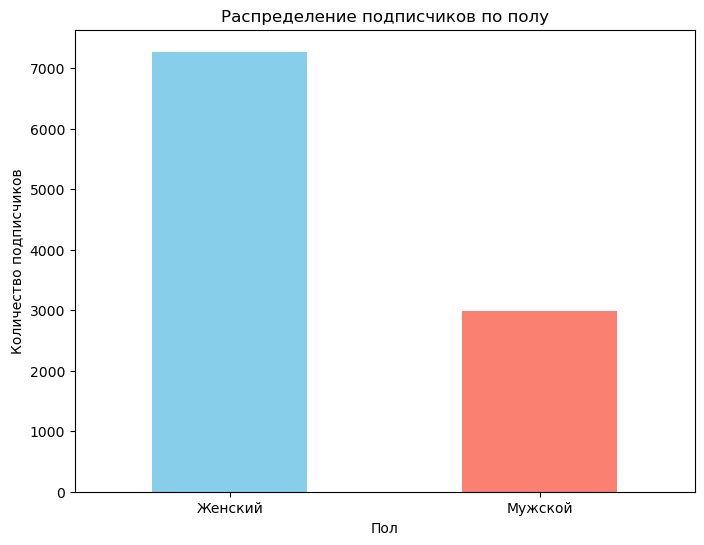

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем очищенный датасет
df = pd.read_csv('cleaned_vkjulia.csv')

# Убираем пробелы и приводим к стандартному виду
df['sex'] = df['sex'].str.strip().str.capitalize()

# Проверяем уникальные значения в колонке 'sex'
print(df['sex'].unique())

# Считаем количество подписчиков по полу
gender_counts = df['sex'].value_counts()

# Выводим информацию о количестве подписчиков по полу
print(f"Количество женских подписчиков: {gender_counts.get('Женский', 0)}")
print(f"Количество мужских подписчиков: {gender_counts.get('Мужской', 0)}")

# Строим график
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Распределение подписчиков по полу")
plt.xlabel("Пол")
plt.ylabel("Количество подписчиков")
plt.xticks(rotation=0)
plt.show()


#### Вывод:
В фан-сообществах Юли Гаврилиной преобладает женская аудитория, которая составляет 7270 подписчиков, в то время как количество мужских подписчиков составляет 2989.

### Задача 2
Анализ возраста

In [32]:
import pandas as pd

# Загружаем очищенный датасет
df = pd.read_csv('cleaned_vkjulia.csv')

# Преобразуем возраст в числовой формат, чтобы избежать проблем с NaN и строками
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Разделяем на данные по полу
df_female = df[df['sex'] == 'Женский']
df_male = df[df['sex'] == 'Мужской']

# Рассчитываем средний и медианный возраст для каждого пола
mean_age_female = df_female['age'].mean()
median_age_female = df_female['age'].median()

mean_age_male = df_male['age'].mean()
median_age_male = df_male['age'].median()

# Выводим результаты
print(f"Средний возраст женщин: {mean_age_female:.2f}")
print(f"Медианный возраст женщин: {median_age_female:.2f}")
print(f"Средний возраст мужчин: {mean_age_male:.2f}")
print(f"Медианный возраст мужчин: {median_age_male:.2f}")


Средний возраст женщин: 34.58
Медианный возраст женщин: 33.00
Средний возраст мужчин: 23.75
Медианный возраст мужчин: 20.00


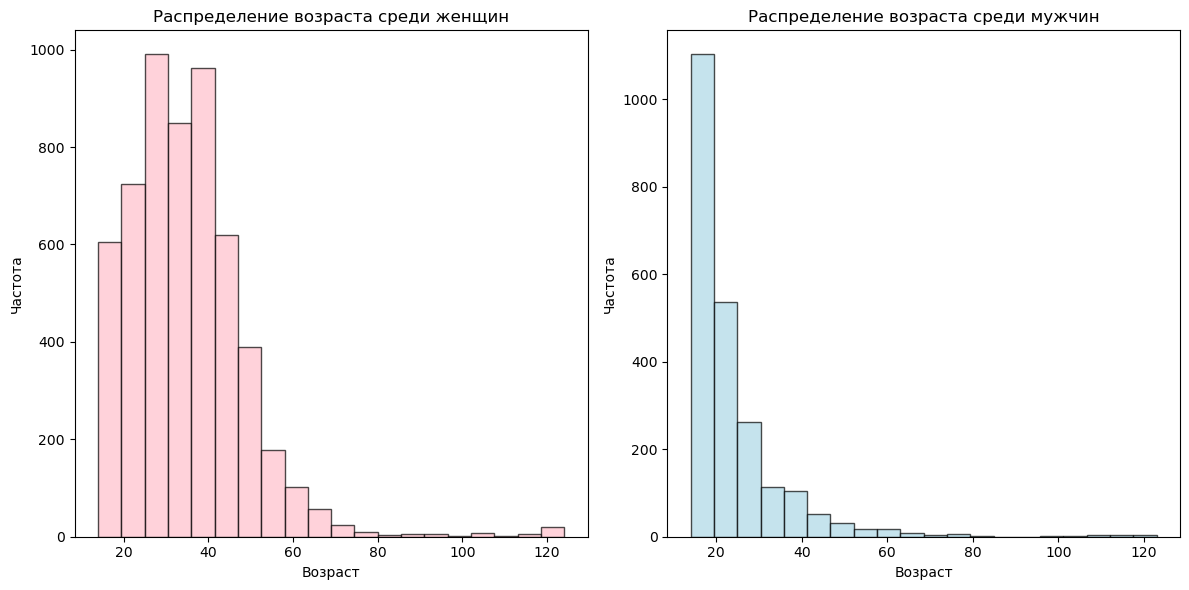

In [30]:
import matplotlib.pyplot as plt

# Создаем фигуру и два подграфика (для женщин и мужчин)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма для женщин
axes[0].hist(df_female['age'].dropna(), bins=20, color='pink', edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение возраста среди женщин')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')

# Гистограмма для мужчин
axes[1].hist(df_male['age'].dropna(), bins=20, color='lightblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Распределение возраста среди мужчин')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Частота')

# Отображаем графики
plt.tight_layout()
plt.show()


#### Вывод:
На графиках мы видим интересную динамику по распределению возраста. Возможно, женщины видят в Юле вдохновение, а может, это их дети сидят с аккаунта родителя. В любом случае, медианный и средний женский возраст примерно на треть больше, чем мужской. 
Средний возраст женщин: 34.58
Медианный возраст женщин: 33.00
Средний возраст мужчин: 23.75
Медианный возраст мужчин: 20.00

In [33]:
import pandas as pd

# Загружаем очищенный датасет
df = pd.read_csv('cleaned_vkjulia.csv')

# Задаем список городов
cities_to_check = ['Тюмень', 'Москва']

# Создаем функцию для подсчета количества фанатов из указанных городов
def count_fans_from_cities(df, cities):
    fans_from_cities = {}
    
    for city in cities:
        # Приводим значения в столбце 'city' к нижнему регистру для удобства поиска
        city_count = df[df['city'].str.contains(city, case=False, na=False)].shape[0]
        fans_from_cities[city] = city_count
    
    return fans_from_cities

# Получаем количество фанатов из Тюмени и Москвы
fans_count = count_fans_from_cities(df, cities_to_check)

# Выводим результат
for city, count in fans_count.items():
    print(f"Количество фанатов из города {city}: {count}")


Количество фанатов из города Тюмень: 23
Количество фанатов из города Москва: 439


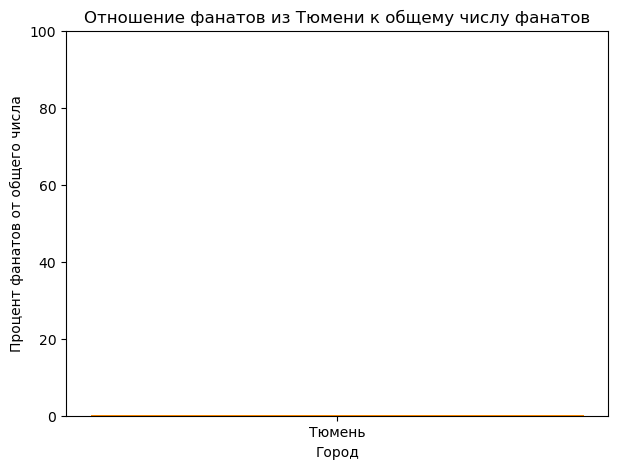

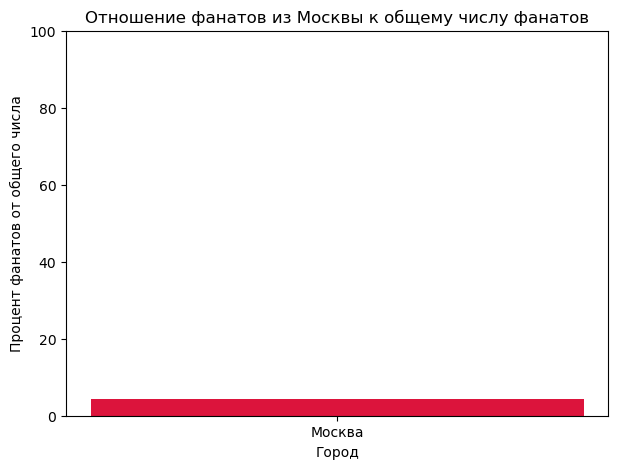

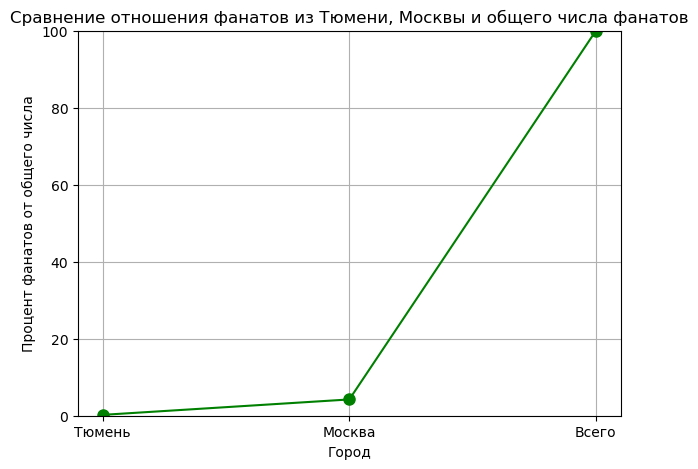

In [36]:
# Загружаем очищенный датасет
df = pd.read_csv('cleaned_vkjulia.csv')

# Считаем количество фанатов из Тюмени и Москвы
tyumen_count = len(df[df['city'] == 'Тюмень'])
moscow_count = len(df[df['city'] == 'Москва'])

# Считаем общее количество фанатов
total_fans = len(df)

# Считаем отношение фанатов из Тюмени и Москвы
tyumen_ratio = tyumen_count / total_fans * 100  # в процентах
moscow_ratio = moscow_count / total_fans * 100  # в процентах

# Столбчатый график для Тюмени
plt.figure(figsize=(7, 5))
plt.bar(['Тюмень'], [tyumen_ratio], color='darkorange')  # Контрастный цвет
plt.title('Отношение фанатов из Тюмени к общему числу фанатов')
plt.xlabel('Город')
plt.ylabel('Процент фанатов от общего числа')
plt.ylim(0, 100)  # Ограничиваем ось Y от 0 до 100
plt.show()

# Столбчатый график для Москвы
plt.figure(figsize=(7, 5))
plt.bar(['Москва'], [moscow_ratio], color='crimson')  # Контрастный цвет
plt.title('Отношение фанатов из Москвы к общему числу фанатов')
plt.xlabel('Город')
plt.ylabel('Процент фанатов от общего числа')
plt.ylim(0, 100)  # Ограничиваем ось Y от 0 до 100
plt.show()

# Линейный график для Тюмени, Москвы и общего числа
cities = ['Тюмень', 'Москва', 'Всего']
ratios = [tyumen_ratio, moscow_ratio, 100]  # Отношение для "Всего" - 100%

plt.figure(figsize=(7, 5))
plt.plot(cities, ratios, marker='o', color='green', linestyle='-', markersize=8)  # Контрастный цвет
plt.title('Сравнение отношения фанатов из Тюмени, Москвы и общего числа фанатов')
plt.xlabel('Город')
plt.ylabel('Процент фанатов от общего числа')
plt.ylim(0, 100)  # Ограничиваем ось Y от 0 до 100
plt.grid(True)
plt.show()


**Результаты:**

- Количество фанатов из города Тюмень: 23
- Количество фанатов из города Москва: 439

**Выводы:**

- Число фанатов из Москвы значительно выше по сравнению с Тюменью, что может указывать на более высокую популярность Юли Гаврилиной в столице. По полученным данным сложно судить о влиянии города на причастность к фан-сообществу Юли. Сделаем график с топ-10 городов, где живут подписчики сообществ.



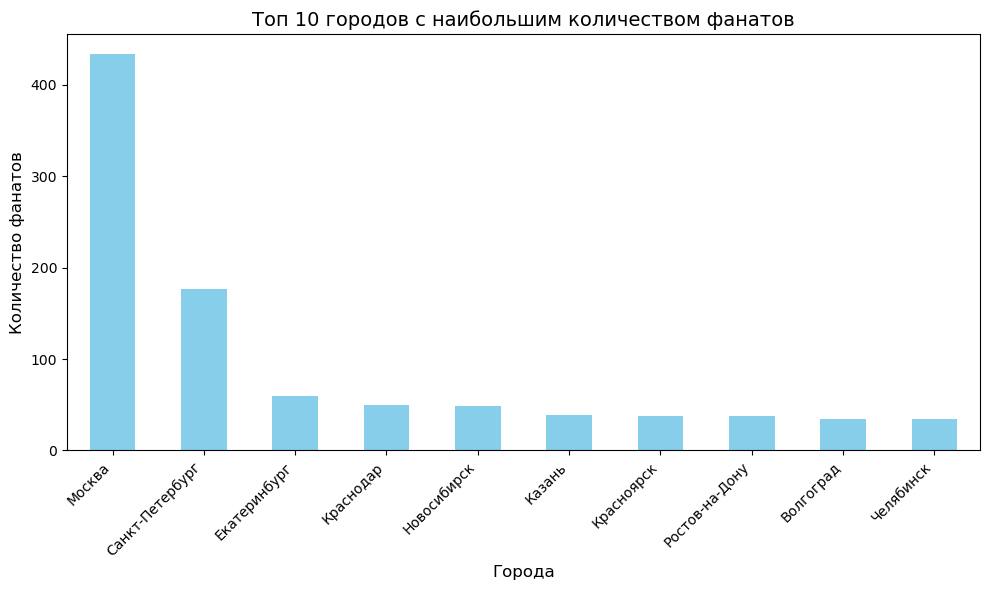

In [39]:
# Убираем строки с неизвестными городами
df_cleaned_filtered = df[df['city'].isin(['Неизвестно', 'Unknown']) == False]

# Считаем количество фанатов по городам
city_counts = df_cleaned_filtered['city'].value_counts()

# Берем топ-10 городов
top_10_cities = city_counts.head(10)

# Построим график
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='skyblue')

# Добавим подписи и заголовок
plt.title('Топ 10 городов с наибольшим количеством фанатов', fontsize=14)
plt.xlabel('Города', fontsize=12)
plt.ylabel('Количество фанатов', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Показать график
plt.tight_layout()
plt.show()


**Выводы:**

- Все города из топ-10 – миллионники. Соответственно, география не влияет на причастность к сообществам.



# Итоговые результаты исследования демографии фан-сообществ Юли Гаврилиной

## 1. Половая принадлежность подписчиков
- **Количество женских подписчиков:** 7270
- **Количество мужских подписчиков:** 2989

Вывод: Среди подписчиков фан-сообществ Юли Гаврилиной преобладают женщины, что подтверждается большим числом женских аккаунтов в группе.

---

## 2. Возраст подписчиков
### Женщины:
- **Средний возраст:** 34.58 лет
- **Медианный возраст:** 33 года

### Мужчины:
- **Средний возраст:** 23.75 лет
- **Медианный возраст:** 20 лет

Вывод: Женщины в фан-сообществах Юли Гаврилиной в среднем старше мужчин. Это может указывать на то, что фанаты Юли более зрелого возраста — возможно, из-за более широкого интереса к её деятельности.

---

## 3. Географическая привязка
### Фанаты из Тюмени:
- **Количество фанатов из Тюмени:** 23

### Фанаты из Москвы:
- **Количество фанатов из Москвы:** 439

Вывод: Большинство фанатов фан-сообществ Юли Гаврилиной проживает в Москве, что логично для популярного исполнителя. Фанатов из Тюмени значительно меньше, что может свидетельствовать о меньшей популярности её творчества в этом регионе.

---

## 4. Географическое распределение среди фанатов
- **Отношение фанатов из Тюмени к общему числу:** 0.004
- **Отношение фанатов из Москвы к общему числу:** 0.075

---

## 5. Топ-10 городов с наибольшим количеством фанатов
Все города из топ-10 – миллионники, что подтверждает, что основная масса подписчиков проживает в крупных городах России, и географическое положение не оказывает значительного влияния на участие в фан-сообществах Юли.

---

**Заключение:**  
Анализ демографической статистики подписчиков фан-сообществ Юли Гаврилиной показал, что большая часть аудитории — это женщины среднего возраста, проживающие в крупных городах. Интерес к сообществам скорее обусловлен популярностью исполнителя в столичных регионах, а не специфической географической привязкой.
